
# Sentiment Analysis on IMDB Reviews

## Objective
In this project, you will perform sentiment analysis on the IMDB movie reviews dataset. The goal is to classify reviews as either positive or negative based on their content.

### Steps to Complete the Project:
1. **Data Preprocessing**: Clean and prepare the text data.
2. **Exploratory Data Analysis (EDA)**: Understand the distribution of the data and insights into word usage.
3. **Feature Engineering**: Convert text into numerical representations (TF-IDF, CountVectorizer).
4. **Model Training**: Train machine learning models (e.g., Logistic Regression, Naive Bayes).
5. **Evaluation**: Assess model performance using metrics like accuracy, precision, recall, and F1-score.
6. **Optimization**: Tune hyperparameters for better results.

---


## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

In [40]:
plt.style.use('dark_background')


## Data processing

In [41]:
path = "data/IMDB Dataset.csv"

data = pd.read_csv(path)
display(data.head())
display(data.describe())

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [43]:
print("Number of Nulll values :", data.isna().sum().sum())

Number of Nulll values : 0


In [44]:
print("Number of duplicate : ",len(data[data.duplicated()]))

Number of duplicate :  418


In [45]:
data.drop_duplicates(inplace=True)
data = data.reset_index(drop=True)


-----

## Exploratory Data Analysis (EDA)

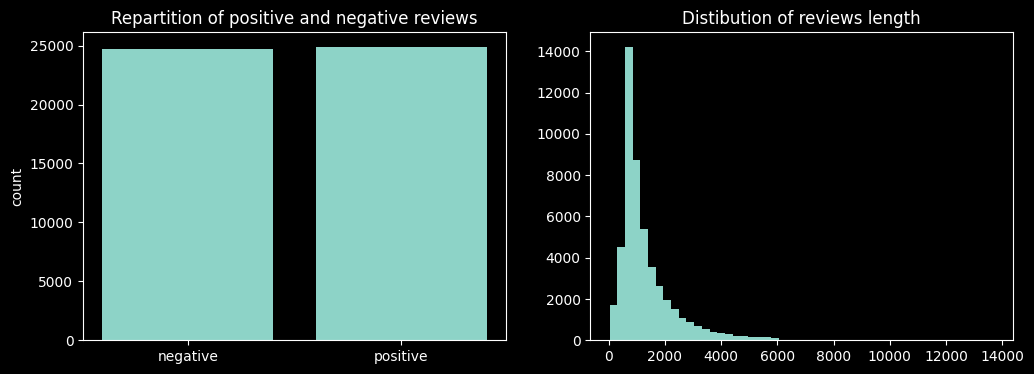

In [46]:
sentiment_plot = data.groupby(["sentiment"]).count().reset_index()
review_plot = data.review.apply(len)

fig, axs =plt.subplots(1, 2, figsize=(12,4))

axs[0].bar(sentiment_plot.sentiment, sentiment_plot.review)
axs[0].set_title("Repartition of positive and negative reviews")
axs[0].set_ylabel("count")

axs[1].hist(review_plot, bins=50)
axs[1].set_title("Distibution of reviews length")

plt.show()

-----

## Feature Engineering

### Count-vectoriizor

In [47]:
# words = set()

# data.review.apply(lambda x: [words.add(word) for word in x.split(" ")])

### TF-IDF (Term Frequency - Inverse Document Frequency)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def to_vectorize(data, max_features = 1000, stop_words = "english", verbose = 0):

    tfidf = TfidfVectorizer(max_features = max_features, stop_words=stop_words)
    result = tfidf.fit_transform(data.review)

    if verbose == 1 : 
        print("Words :")
        print(tfidf.get_feature_names_out())
        
    return result

result = to_vectorize(data=data, verbose=1)

Words :
['10' '100' '15' '20' '30' '50' '80' '90' 'ability' 'able' 'absolutely'
 'accent' 'act' 'acted' 'acting' 'action' 'actor' 'actors' 'actress'
 'actual' 'actually' 'add' 'added' 'admit' 'adult' 'adventure' 'age' 'ago'
 'agree' 'air' 'alien' 'alive' 'amazing' 'america' 'american' 'amusing'
 'animation' 'annoying' 'anti' 'apart' 'apparently' 'appear' 'appears'
 'appreciate' 'aren' 'army' 'art' 'aside' 'ask' 'atmosphere' 'attempt'
 'attempts' 'attention' 'audience' 'audiences' 'average' 'avoid' 'away'
 'awesome' 'awful' 'baby' 'background' 'bad' 'badly' 'band' 'barely'
 'based' 'basic' 'basically' 'battle' 'beautiful' 'beauty' 'begin'
 'beginning' 'begins' 'believable' 'believe' 'ben' 'best' 'better' 'big'
 'biggest' 'bit' 'bizarre' 'black' 'blood' 'blue' 'body' 'book' 'books'
 'bored' 'boring' 'bought' 'box' 'boy' 'boys' 'br' 'brain' 'break'
 'brilliant' 'bring' 'brings' 'british' 'brother' 'brothers' 'brought'
 'budget' 'bunch' 'business' 'buy' 'called' 'came' 'camera' 'camp' 'car

In [137]:
def vector_to_df(vectors, data):
    df = pd.DataFrame(vectors.toarray())
    df["sentiment"] = data.sentiment

    df.sentiment = df.sentiment.map({"positive" : 1,"negative" : 0})
    return df

df = vector_to_df(result, data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,sentiment
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.115582,0.0,0.000000,0.127029,0.0,0.000000,1
3,0.092243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.337799,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.131456,0.000000,0.0,0.000000,1


-----

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=["sentiment"])
Y = df.sentiment
test_size = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

model = LogisticRegression()

model.fit(X_train, Y_train)


LogisticRegression()

## Evaluation 

In [152]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score
import seaborn as sns


In [143]:
Y_pred = model.predict(X_test)

report = classification_report(Y_test, Y_pred, target_names=["negative", "positive"], digits=3)
print(report)

              precision    recall  f1-score   support

    negative      0.869     0.841     0.855      4939
    positive      0.847     0.875     0.861      4978

    accuracy                          0.858      9917
   macro avg      0.858     0.858     0.858      9917
weighted avg      0.858     0.858     0.858      9917



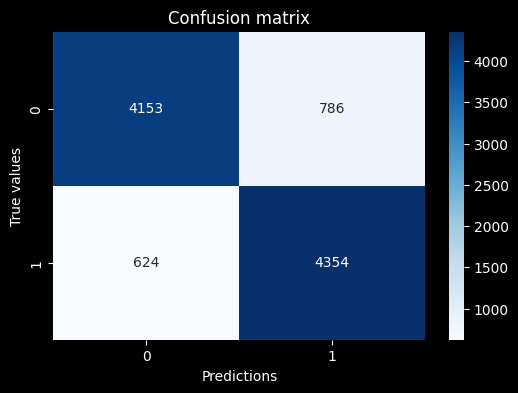

In [79]:
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Confusion matrix")
plt.show()

----

## Optimization

In [232]:
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
import plotly.express as px
import plotly.io as pio

### Using gridsearch

In [124]:
params = [    
    {
    # 'penalty' : ['l1', 'l2', 'elasticnet', 'none'],   # Used to specify the norm used in the penalization.
    # 'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],  # Algorithm to use in the optimization problem.
    'max_iter' : [75, 100, 150]                # Maximum number of iterations taken for the solvers to converge.
    }
]

clf = GridSearchCV(estimator = LogisticRegression(), param_grid = params, scoring = 'accuracy', cv = 3, verbose=1, n_jobs=-1)
clf_fit = clf.fit(X,Y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [123]:
print("Best params :",clf_fit.best_params_)
print("Best accuracy :", round(clf_fit.best_score_, 3))

Best params : {'max_iter': 75}
Best accuracy : 0.86


### Searching for the best number of words

In [178]:
def search_features(data, features, interations=[100], cross_validation = False):

    result = pd.DataFrame(columns=["features","iteration","accuracy"])

    for f in features:
        for i in interations :
            vectors = to_vectorize(data, max_features=f)
            df = vector_to_df(vectors, data)

            if cross_validation :
                print("test")

            else : 
                X = df.drop(columns=["sentiment"])
                Y = df.sentiment
                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
                
                model = LogisticRegression(max_iter=i)
                model.fit(X_train, Y_train)

                Y_pred = model.predict(X_test)
                acc = accuracy_score(Y_pred, Y_test)

            result.loc[len(result)] = [f, i,round(acc,4)]

    return result


In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

features    = [500, 1000, 2500, 5000, 7500, 10000, 12500, 15000]
iterations  = [100, 200, 300]

res = search_features(data, features, iterations)

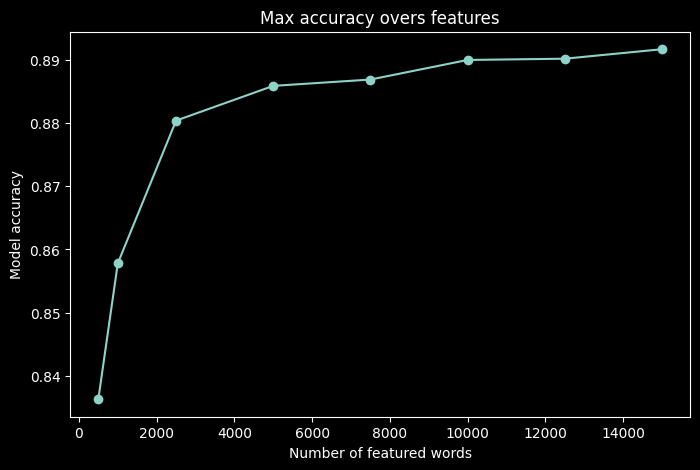

In [ ]:
plot_acc = res.groupby(["features"]).max().reset_index()
plt.figure(figsize=(8,5))

plt.title("Max accuracy overs features")
plt.plot(plot_acc.features, plot_acc.accuracy, marker='o')
plt.ylabel("Model accuracy")
plt.xlabel("Number of featured words")

plt.show()



In [ ]:
pio.templates.default = "plotly_dark"


# Création du graphique interactif
fig = px.line(
    plot_acc,
    x="features",
    y="accuracy",
    title="Max Accuracy over Features",
    labels={"features": "Number of Featured Words", "accuracy": "Model Accuracy"},
    markers=True  #
)

fig.update_traces(line=dict(color="royalblue"), marker=dict(size=8))
fig.update_layout(title_font_size=16, font_size=12)
fig.update_layout(
    width=800,   
    height=500   
)

fig.show()
